# Import the necessary libraries

In [3]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd
 
# Configure logging
logging.basicConfig(filename='../logs/',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_csv_data import Load_CSV_Data
from missing_values_handler import handle_missing_values
from data_cleaning import clean_data
from eda import eda_univariate, eda_bivariate


# Load data

In [4]:
df = Load_CSV_Data('../data/IpAddress_to_Country.csv')
df.load_csv_data()
df = df.get_data()

Data successfully loaded from ../data/IpAddress_to_Country.csv


In [5]:
df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
# 3. Handle Missing Values for both datasets

# Display missing values before handling
print("\nMissing Values in User Purchase Data Before Handling:")
print(df.isnull().sum())

df_cleaned = handle_missing_values(df)

print(df_cleaned.isnull().sum())



Missing Values in User Purchase Data Before Handling:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Columns with missing values: []
Missing value counts:
Series([], dtype: float64)

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [8]:
# Clean the user purchase data (remove duplicates, correct data types)
df_cleaned = clean_data(df_cleaned)

# Display the cleaned data
print("\nCleaned User Purchase Data:")
df_cleaned.head()


Removed 0 duplicate rows.

Cleaned User Purchase Data:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



Univariate Analysis on IP Address Data:


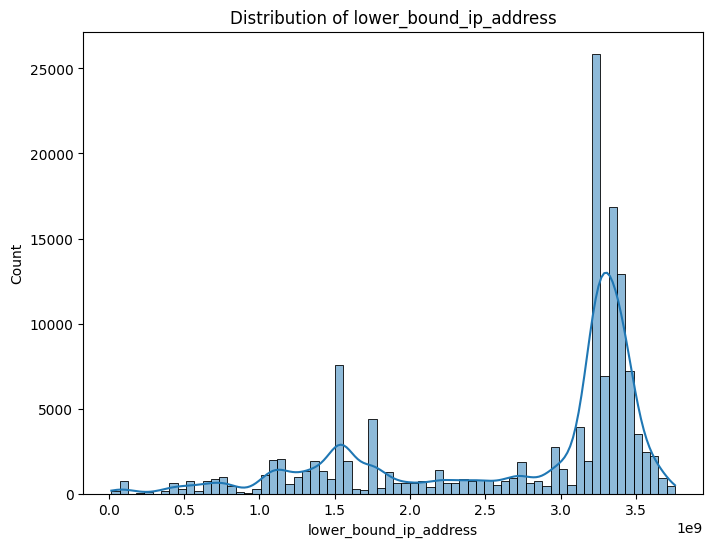

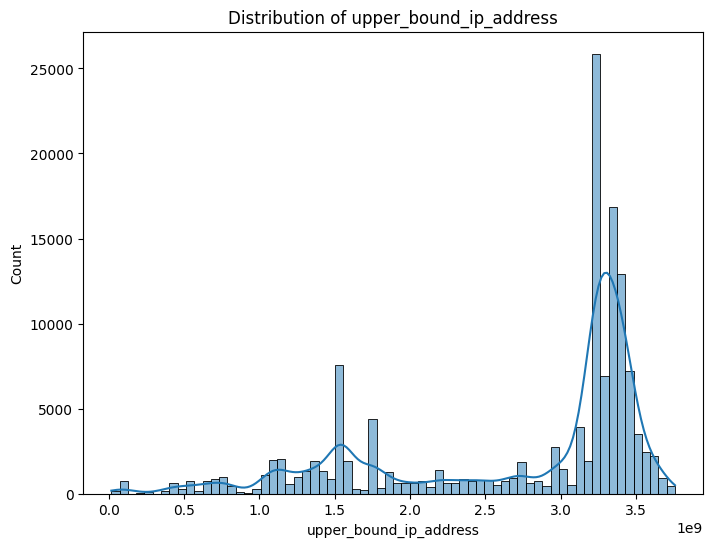

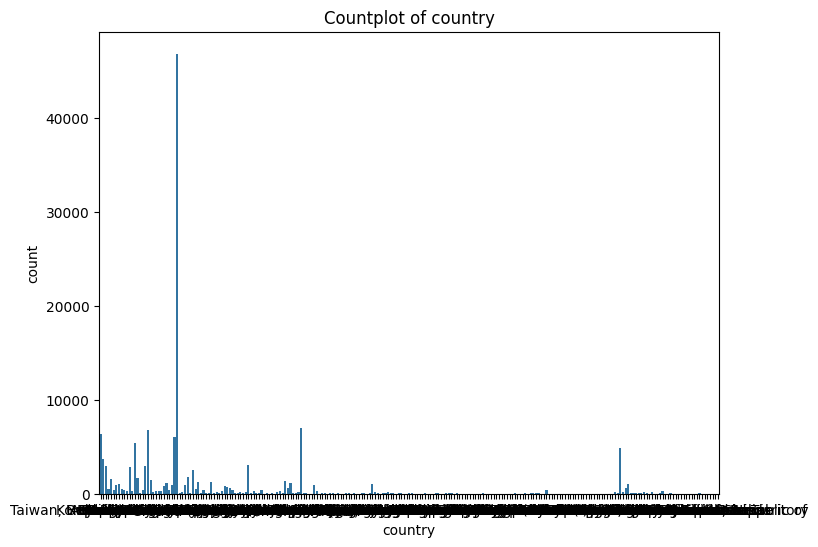


Bivariate Analysis (IP Data: Lower vs Upper Bound IP Address):


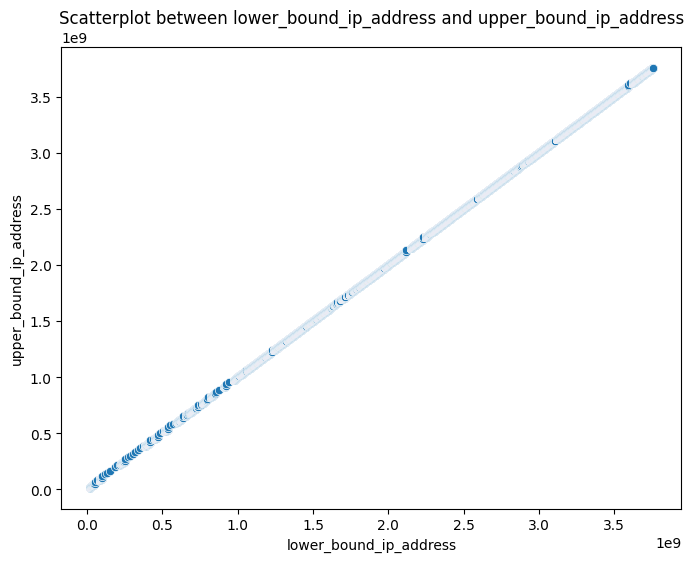

In [9]:
# 5. Perform EDA

print("\nUnivariate Analysis on IP Address Data:")
eda_univariate(df_cleaned, columns=['lower_bound_ip_address', 'upper_bound_ip_address', 'country'])

# Bivariate Analysis between lower and upper bound IP addresses in IP data
print("\nBivariate Analysis (IP Data: Lower vs Upper Bound IP Address):")
eda_bivariate(df_cleaned, 'lower_bound_ip_address', 'upper_bound_ip_address')

In [10]:
# Save the cleaned  data
df_cleaned.to_csv("../data/cleaned_IpAddress_to_Country.csv", index=False)
print("Cleaned data saved as 'cleaned_IpAddress_to_Country.csv'")

Cleaned data saved as 'cleaned_IpAddress_to_Country.csv'
